# Visualise found objects inside the FOV

In [9]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from get_brightest import select_objects
from utils import *

with open('337.all.tsv', 'r') as f:
    data = [x.split('\t') for x in f.read().split('\n')][1:-1]
    
id_col = data[0].index('source_id')
ra_col = data[0].index('ra_ep2000')
dec_col = data[0].index('dec_ep2000')
mag_col = data[0].index('phot_g_mean_mag')

RA, DEC = 0, 0
FOV_H, FOV_V = 1/2, 1/2
N = 1000

In [10]:
objects = select_objects(data, RA, DEC, FOV_H, FOV_V, N, ra_col, dec_col, mag_col)

<IPython.core.display.Javascript object>


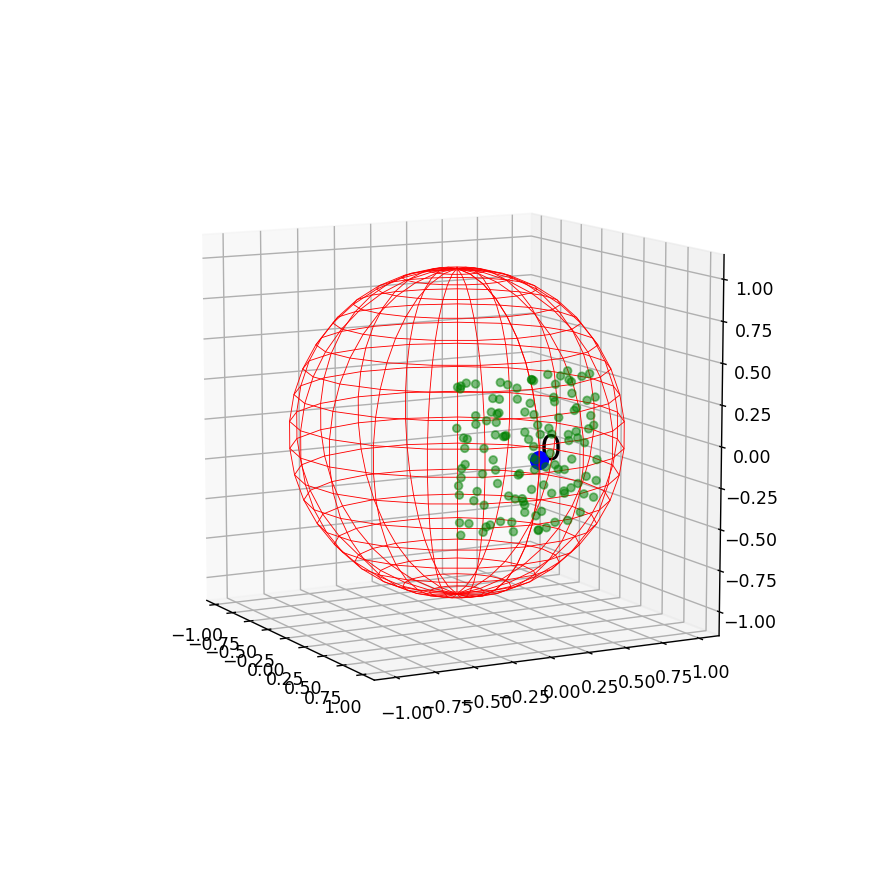

In [11]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

# draw sphere
ra, dec = np.mgrid[0:2*np.pi:20j, -np.pi/2:np.pi/2:20j]
x = np.cos(ra) * np.cos(dec)
y = np.sin(ra) * np.cos(dec)
z = np.sin(dec)
ax.plot_wireframe(x, y, z, color="r", linewidth=0.5)

x0 = np.cos(RA) * np.cos(DEC)
y0 = np.sin(RA) * np.cos(DEC)
z0 = np.sin(DEC)

a = np.array([[deg_to_rad(x[ra_col]), deg_to_rad(x[dec_col])] for x in objects])
x1 = np.cos(a[:, 0]) * np.cos(a[:, 1])
y1 = np.sin(a[:, 0]) * np.cos(a[:, 1])
z1 = np.sin(a[:, 1])
ax.scatter(x1, y1, z1, color="g", s=20, alpha=0.5)
ax.scatter(x0, y0, z0, color='b', s=100)
ax.text(1,0,0,  '0', size=20, zorder=1, color='k')
plt.show()